<a href="https://colab.research.google.com/github/Karthikreddy1010/NFL_BIG_DATA_BOWL/blob/main/NFL_Big_data_bowl_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **`NFL BIG DATA BOWL`**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
games=pd.read_csv("/content/games.csv")
games.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,9/8/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,9/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,9/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,9/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,9/11/2022,13:00:00,CIN,PIT,20,23


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gameId             136 non-null    int64 
 1   season             136 non-null    int64 
 2   week               136 non-null    int64 
 3   gameDate           136 non-null    object
 4   gameTimeEastern    136 non-null    object
 5   homeTeamAbbr       136 non-null    object
 6   visitorTeamAbbr    136 non-null    object
 7   homeFinalScore     136 non-null    int64 
 8   visitorFinalScore  136 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 9.7+ KB


In [4]:
games.describe()

,gameId,season,week,homeFinalScore,visitorFinalScore
count,1.360000e+02,136.0,136.000000,136.000000,136.000000
mean,2.022099e+09,2022.0,4.845588,22.669118,20.948529
std,5.996614e+03,0.0,2.567254,8.659874,9.731446
min,2.022091e+09,2022.0,1.000000,3.000000,0.000000
25%,2.022093e+09,2022.0,3.000000,17.000000,14.750000
50%,2.022101e+09,2022.0,5.000000,22.500000,20.000000
75%,2.022102e+09,2022.0,7.000000,27.000000,27.000000
max,2.022111e+09,2022.0,9.000000,49.000000,48.000000


In [5]:
games=games.drop_duplicates()

In [6]:
len(games)

136

In [7]:
games.isnull().sum()

,0
gameId,0
season,0
week,0
gameDate,0
gameTimeEastern,0
homeTeamAbbr,0
visitorTeamAbbr,0
homeFinalScore,0
visitorFinalScore,0


In [8]:
fig=px.box(games,x='homeFinalScore',title="Home Final Score")
fig.show()

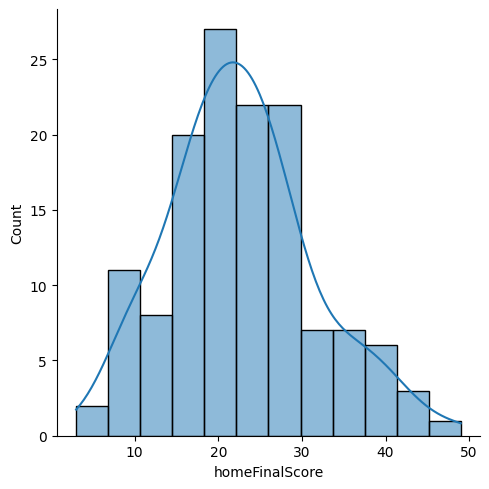

In [9]:
sns.displot(games['homeFinalScore'],kde=True)

In [10]:
fig1=px.box(games,x="visitorFinalScore",title="visitor Final Score")
fig1.show()

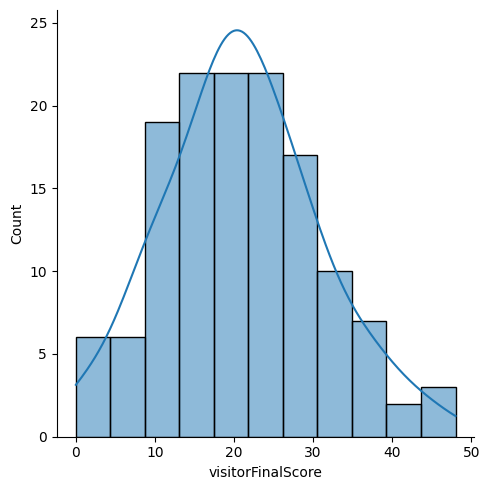

In [11]:
sns.displot(games['visitorFinalScore'],kde=True)

## **EDA**

In [12]:
games['Diff_score']=games['homeFinalScore']-games['visitorFinalScore']

# **`Home or Visitor team won column`**

In [13]:
games['won'] = np.where(games['homeFinalScore'] > games['visitorFinalScore'], 'Home', 'Visitor')

In [14]:
games['homeTeamAbbr'].unique()

array(['LA', 'ATL', 'CAR', 'CHI', 'CIN', 'DET', 'HOU', 'MIA', 'NYJ',
       'WAS', 'ARI', 'LAC', 'MIN', 'TEN', 'DAL', 'SEA', 'KC', 'BAL',
       'CLE', 'JAX', 'NO', 'NYG', 'PIT', 'SF', 'DEN', 'LV', 'GB', 'BUF',
       'PHI', 'IND', 'NE', 'TB'], dtype=object)

In [15]:
games['visitorTeamAbbr'].unique()

array(['BUF', 'NO', 'CLE', 'SF', 'PIT', 'PHI', 'IND', 'NE', 'BAL', 'JAX',
       'KC', 'LV', 'GB', 'NYG', 'TB', 'DEN', 'LAC', 'MIA', 'NYJ', 'WAS',
       'CAR', 'ATL', 'SEA', 'CIN', 'HOU', 'ARI', 'CHI', 'TEN', 'MIN',
       'DET', 'LA', 'DAL'], dtype=object)

In [16]:
#games['LA_home_won']=np.where(games['homeTeamAbbr']=='LA',1,0)
#games['LA_visitor_won']=np.where(games['visitorTeamAbbr']=='LA',1,0)
#
games['LA_home_won'] = (games['homeTeamAbbr'] == 'LA') & (games['won'] == 'Home')

# won True if not Flase
games['LA_visitor_won'] = (games['visitorTeamAbbr'] == 'LA') & (games['won'] == 'Visitor')

In [17]:
games.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore,Diff_score,won,LA_home_won,LA_visitor_won
0,2022090800,2022,1,9/8/2022,20:20:00,LA,BUF,10,31,-21,Visitor,False,False
1,2022091100,2022,1,9/11/2022,13:00:00,ATL,NO,26,27,-1,Visitor,False,False
2,2022091101,2022,1,9/11/2022,13:00:00,CAR,CLE,24,26,-2,Visitor,False,False
3,2022091102,2022,1,9/11/2022,13:00:00,CHI,SF,19,10,9,Home,False,False
4,2022091103,2022,1,9/11/2022,13:00:00,CIN,PIT,20,23,-3,Visitor,False,False


<Axes: xlabel='won', ylabel='count'>

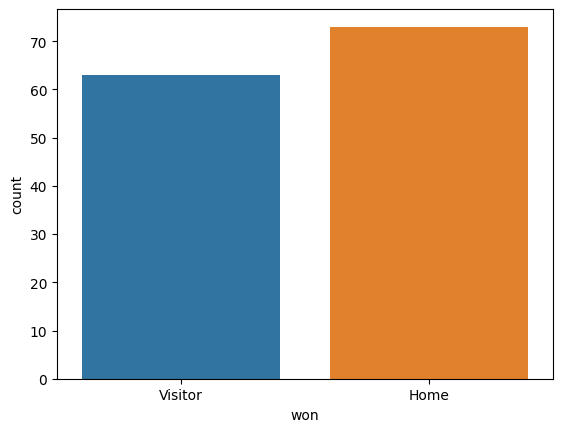

In [18]:
sns.countplot(games,x='won',hue='won')

In [19]:
# Calculate the total number of wins for LA at home and as a visitor
LA_home_won = games[games['LA_home_won'] == True]
LA_visitor_won = games[games['LA_visitor_won'] == True]

LA_home_won_count = len(LA_home_won)
LA_visitor_won_count = len(LA_visitor_won)

print("Number of times LA won at home:", LA_home_won_count)
print("Number of times LA won as a visitor:", LA_visitor_won_count)

# Total matches played by LA as home and visitor
home_total_matches = games['homeTeamAbbr'].value_counts()['LA']
visitor_total_matches = games['visitorTeamAbbr'].value_counts()['LA']
total_matches_CA = home_total_matches + visitor_total_matches

print("Total matches played by LA:", total_matches_CA)
print("Home matches played by LA:", home_total_matches)
print("Visitor matches played by LA:", visitor_total_matches)

# Correct percentage calculation
home_win_percentage = (LA_home_won_count / home_total_matches) * 100
visitor_win_percentage = (LA_visitor_won_count / visitor_total_matches) * 100

print("Home win percentage:", home_win_percentage)
print("Visitor win percentage:", visitor_win_percentage)



Number of times LA won at home: 2
Number of times LA won as a visitor: 1
Total matches played by LA: 8
Home matches played by LA: 5
Visitor matches played by LA: 3
Home win percentage: 40.0
Visitor win percentage: 33.33333333333333


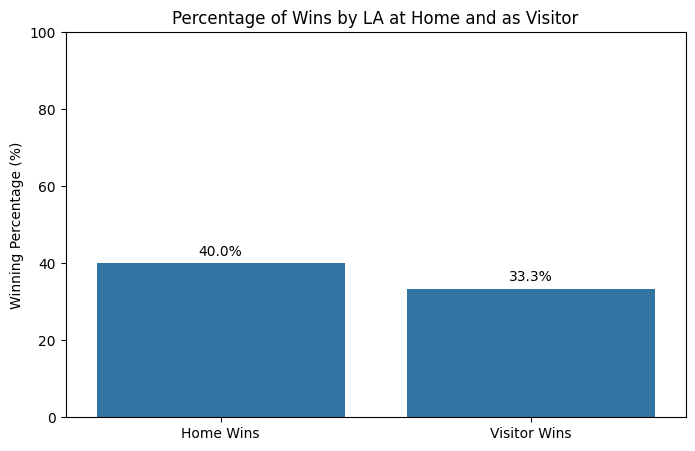

In [20]:
categories = ['Home Wins', 'Visitor Wins']
percentages = [home_win_percentage, visitor_win_percentage]

plt.figure(figsize=(8, 5))
sns.barplot(x=categories, y=percentages)

plt.title('Percentage of Wins by LA at Home and as Visitor')
plt.ylabel('Winning Percentage (%)')
plt.ylim(0, 100)

for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 2, f'{percentage:.1f}%', ha='center')

plt.show()


In [21]:

games['ATL_home_won'] = (games['homeTeamAbbr'] == 'ATL') & (games['won'] == 'Home')

# won True if not Flase
games['ATL_visitor_won'] = (games['visitorTeamAbbr'] == 'ATL') & (games['won'] == 'Visitor')

In [22]:
# Calculate the total number of wins for ATL at home and as a visitor
ATL_home_won = games[games['ATL_home_won'] == True]
ATL_visitor_won = games[games['ATL_visitor_won'] == True]

ATL_home_won_count = len(ATL_home_won)
ATL_visitor_won_count = len(ATL_visitor_won)

print("Number of times ATL won at home:", ATL_home_won_count)
print("Number of times ATL won as a visitor:", ATL_visitor_won_count)

# Total matches played by ATL as home and visitor
home_total_matches = games['homeTeamAbbr'].value_counts()['ATL']
visitor_total_matches = games['visitorTeamAbbr'].value_counts()['ATL']
total_matches_CA = home_total_matches + visitor_total_matches

print("Total matches played by ATL:", total_matches_CA)
print("Home matches played by ATL:", home_total_matches)
print("Visitor matches played by ATL:", visitor_total_matches)

# Correct percentage calculation
home_win_percentage = (ATL_home_won_count / home_total_matches) * 100
visitor_win_percentage = (ATL_visitor_won_count / visitor_total_matches) * 100

print("Home win percentage:", home_win_percentage)
print("Visitor win percentage:", visitor_win_percentage)


Number of times ATL won at home: 3
Number of times ATL won as a visitor: 1
Total matches played by ATL: 9
Home matches played by ATL: 5
Visitor matches played by ATL: 4
Home win percentage: 60.0
Visitor win percentage: 25.0


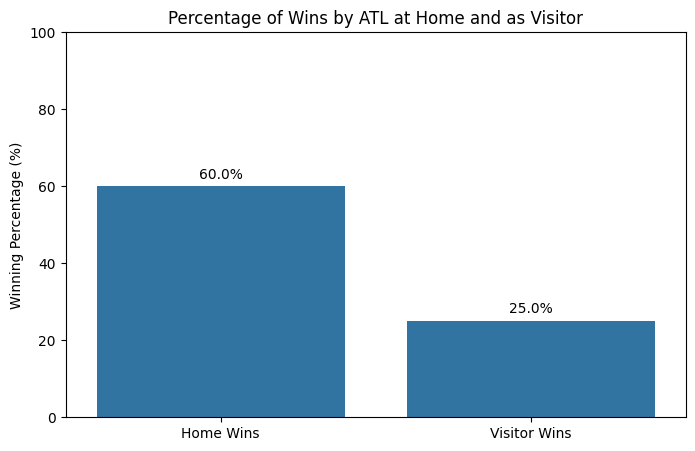

In [23]:
categories = ['Home Wins', 'Visitor Wins']
percentages = [home_win_percentage, visitor_win_percentage]

plt.figure(figsize=(8, 5))
sns.barplot(x=categories, y=percentages)

plt.title('Percentage of Wins by ATL at Home and as Visitor')
plt.ylabel('Winning Percentage (%)')
plt.ylim(0, 100)

for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 2, f'{percentage:.1f}%', ha='center')

plt.show()


In [24]:

games['CAR_home_won'] = (games['homeTeamAbbr'] == 'CAR') & (games['won'] == 'Home')

# won True if not Flase
games['CAR_visitor_won'] = (games['visitorTeamAbbr'] == 'CAR') & (games['won'] == 'Visitor')

In [25]:
# Calculate the total number of wins for CAR at home and as a visitor
CAR_home_won = games[games['CAR_home_won'] == True]
CAR_visitor_won = games[games['CAR_visitor_won'] == True]

CAR_home_won_count = len(CAR_home_won)
CAR_visitor_won_count = len(CAR_visitor_won)

print("Number of times CAR won at home:", CAR_home_won_count)
print("Number of times CAR won as a visitor:", CAR_visitor_won_count)

# Total matches played by CAR as home and visitor
home_total_matches = games['homeTeamAbbr'].value_counts()['CAR']
visitor_total_matches = games['visitorTeamAbbr'].value_counts()['CAR']
total_matches_CA = home_total_matches + visitor_total_matches

print("Total matches played by CAR:", total_matches_CA)
print("Home matches played by CAR:", home_total_matches)
print("Visitor matches played by CAR:", visitor_total_matches)

# Correct percentage calculation
home_win_percentage = (CAR_home_won_count / home_total_matches) * 100
visitor_win_percentage = (CAR_visitor_won_count / visitor_total_matches) * 100

print("Home win percentage:", home_win_percentage)
print("Visitor win percentage:", visitor_win_percentage)


Number of times CAR won at home: 2
Number of times CAR won as a visitor: 0
Total matches played by CAR: 9
Home matches played by CAR: 5
Visitor matches played by CAR: 4
Home win percentage: 40.0
Visitor win percentage: 0.0


**Function for to check the team won in home ground or visitor ground**

In [26]:
def add_winning_columns(games, team_abbr):

    home_won_col = f'{team_abbr}_home_won'
    visitor_won_col = f'{team_abbr}_visitor_won'

    games[home_won_col] = (games['homeTeamAbbr'] == team_abbr) & (games['won'] == 'Home')
    games[visitor_won_col] = (games['visitorTeamAbbr'] == team_abbr) & (games['won'] == 'Visitor')

    return games


# **Total matches played by team and percentage of won in Home or Visitor ground.**

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_team_wins(games, team_abbr):

    # Filter games based on the team abbreviation
    home_won_col = f'{team_abbr}_home_won'
    visitor_won_col = f'{team_abbr}_visitor_won'

    # Calculate the total number of wins for the team at home and as a visitor
    team_home_won = games[games[home_won_col] == True]
    team_visitor_won = games[games[visitor_won_col] == True]

    team_home_won_count = len(team_home_won)
    team_visitor_won_count = len(team_visitor_won)

    print(f"Number of times {team_abbr} won at home:", team_home_won_count)
    print(f"Number of times {team_abbr} won as a visitor:", team_visitor_won_count)

    # Total matches played by the team as home and visitor
    home_total_matches = games['homeTeamAbbr'].value_counts()[team_abbr]
    visitor_total_matches = games['visitorTeamAbbr'].value_counts()[team_abbr]
    total_matches = home_total_matches + visitor_total_matches

    print(f"Total matches played by {team_abbr}:", total_matches)
    print(f"Home matches played by {team_abbr}:", home_total_matches)
    print(f"Visitor matches played by {team_abbr}:", visitor_total_matches)

    # Calculate the win percentages
    home_win_percentage = (team_home_won_count / home_total_matches) * 100
    visitor_win_percentage = (team_visitor_won_count / visitor_total_matches) * 100

    print(f"Home win percentage for {team_abbr}:", home_win_percentage)
    print(f"Visitor win percentage for {team_abbr}:", visitor_win_percentage)

    # Plot the results
    categories = ['Home Wins', 'Visitor Wins']
    percentages = [home_win_percentage, visitor_win_percentage]

    plt.figure(figsize=(8, 5))
    sns.barplot(x=categories, y=percentages)

    # Add titles and labels
    plt.title(f'Percentage of Wins by {team_abbr} at Home and as Visitor')
    plt.ylabel('Winning Percentage (%)')
    plt.ylim(0, 100)

    # Display percentages on top of bars
    for i, percentage in enumerate(percentages):
        plt.text(i, percentage + 2, f'{percentage:.1f}%', ha='center')

    # Show the plot
    plt.show()


Number of times CHI won at home: 2
Number of times CHI won as a visitor: 1
Total matches played by CHI: 9
Home matches played by CHI: 4
Visitor matches played by CHI: 5
Home win percentage for CHI: 50.0
Visitor win percentage for CHI: 20.0


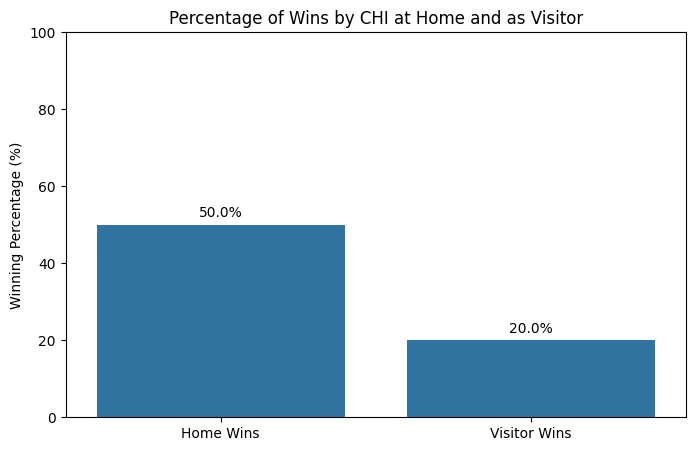

In [28]:
games = add_winning_columns(games, 'CHI')

calculate_team_wins(games, 'CHI')


Number of times CIN won at home: 3
Number of times CIN won as a visitor: 2
Total matches played by CIN: 9
Home matches played by CIN: 4
Visitor matches played by CIN: 5
Home win percentage for CIN: 75.0
Visitor win percentage for CIN: 40.0


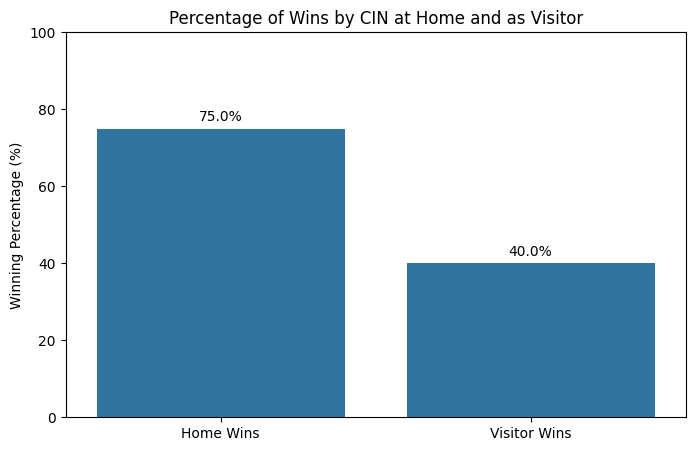

In [29]:
games = add_winning_columns(games, 'CIN')

calculate_team_wins(games, 'CIN')


Number of times DET won at home: 2
Number of times DET won as a visitor: 0
Total matches played by DET: 8
Home matches played by DET: 5
Visitor matches played by DET: 3
Home win percentage for DET: 40.0
Visitor win percentage for DET: 0.0


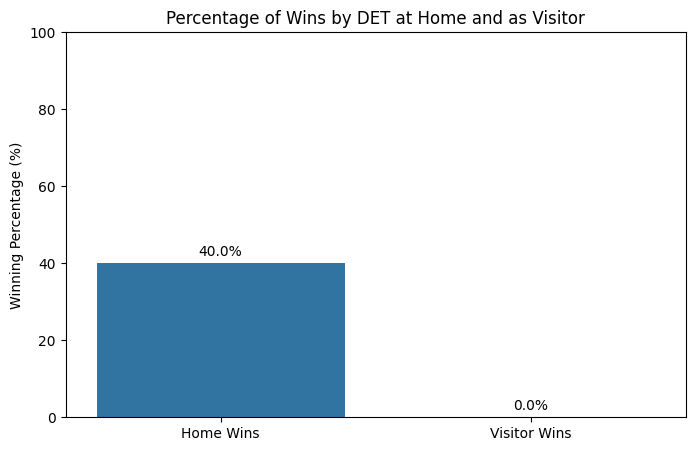

In [30]:
games = add_winning_columns(games, 'DET')

calculate_team_wins(games, 'DET')


Number of times HOU won at home: 0
Number of times HOU won as a visitor: 1
Total matches played by HOU: 8
Home matches played by HOU: 4
Visitor matches played by HOU: 4
Home win percentage for HOU: 0.0
Visitor win percentage for HOU: 25.0


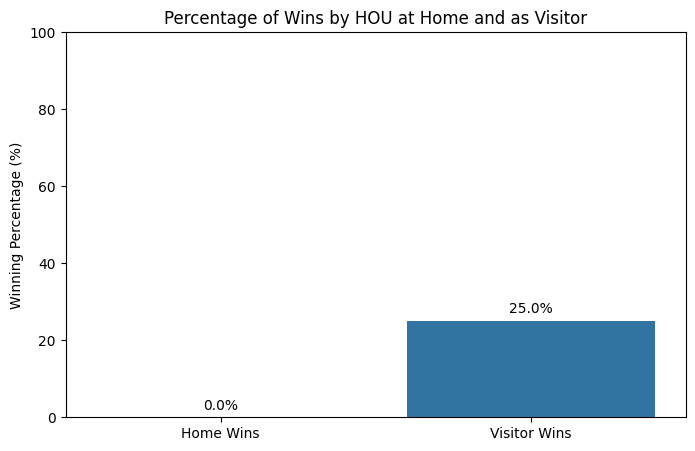

In [31]:
games = add_winning_columns(games, 'HOU')

calculate_team_wins(games, 'HOU')


Number of times MIA won at home: 3
Number of times MIA won as a visitor: 3
Total matches played by MIA: 9
Home matches played by MIA: 4
Visitor matches played by MIA: 5
Home win percentage for MIA: 75.0
Visitor win percentage for MIA: 60.0


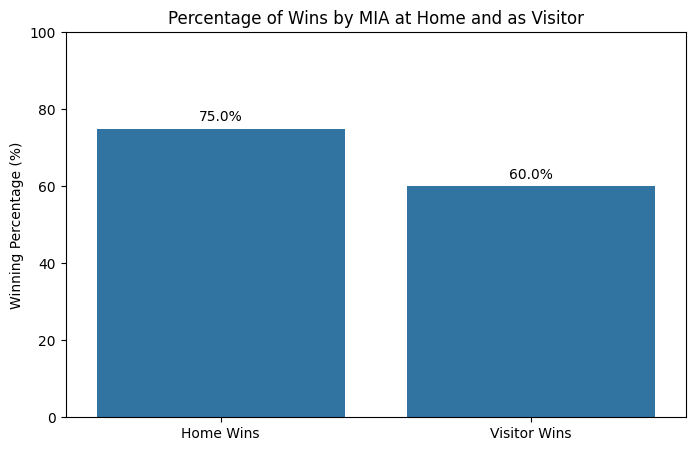

In [32]:
games = add_winning_columns(games, 'MIA')

calculate_team_wins(games, 'MIA')


Number of times NYJ won at home: 2
Number of times NYJ won as a visitor: 4
Total matches played by NYJ: 9
Home matches played by NYJ: 5
Visitor matches played by NYJ: 4
Home win percentage for NYJ: 40.0
Visitor win percentage for NYJ: 100.0


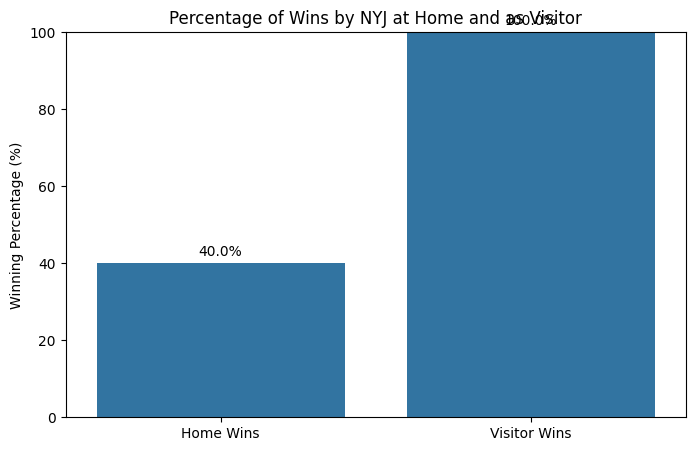

In [33]:
games = add_winning_columns(games, 'NYJ')

calculate_team_wins(games, 'NYJ')


Number of times WAS won at home: 2
Number of times WAS won as a visitor: 2
Total matches played by WAS: 9
Home matches played by WAS: 5
Visitor matches played by WAS: 4
Home win percentage for WAS: 40.0
Visitor win percentage for WAS: 50.0


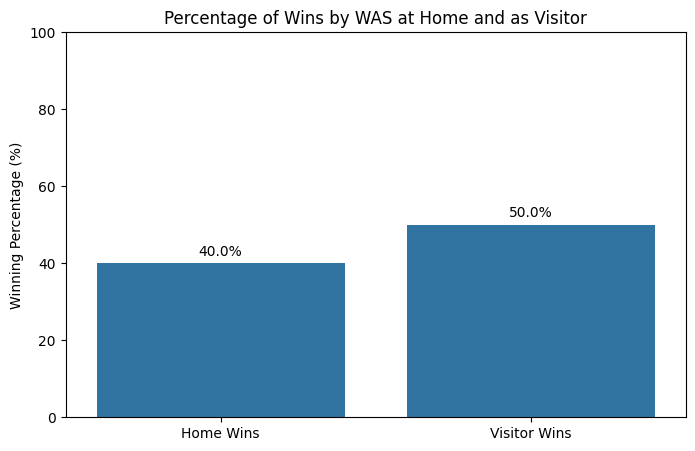

In [34]:
games = add_winning_columns(games, 'WAS')

calculate_team_wins(games, 'WAS')


Number of times ARI won at home: 1
Number of times ARI won as a visitor: 2
Total matches played by ARI: 9
Home matches played by ARI: 5
Visitor matches played by ARI: 4
Home win percentage for ARI: 20.0
Visitor win percentage for ARI: 50.0


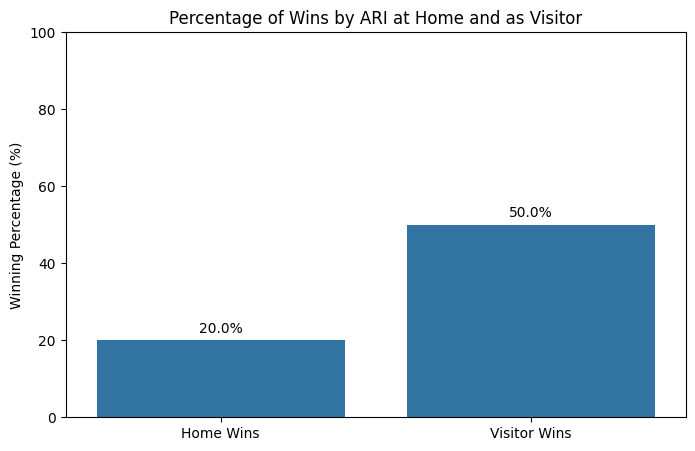

In [35]:
games = add_winning_columns(games, 'ARI')

calculate_team_wins(games, 'ARI')


Number of times MIN won at home: 4
Number of times MIN won as a visitor: 3
Total matches played by MIN: 8
Home matches played by MIN: 4
Visitor matches played by MIN: 4
Home win percentage for MIN: 100.0
Visitor win percentage for MIN: 75.0


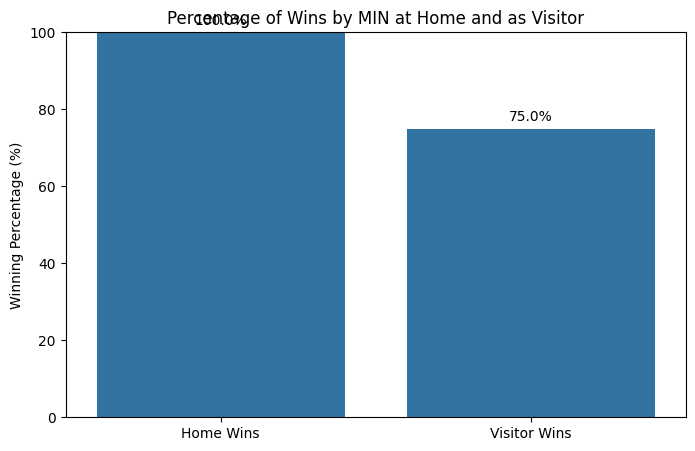

In [36]:
games = add_winning_columns(games, 'MIN')

calculate_team_wins(games, 'MIN')


Number of times TEN won at home: 2
Number of times TEN won as a visitor: 3
Total matches played by TEN: 8
Home matches played by TEN: 3
Visitor matches played by TEN: 5
Home win percentage for TEN: 66.66666666666666
Visitor win percentage for TEN: 60.0


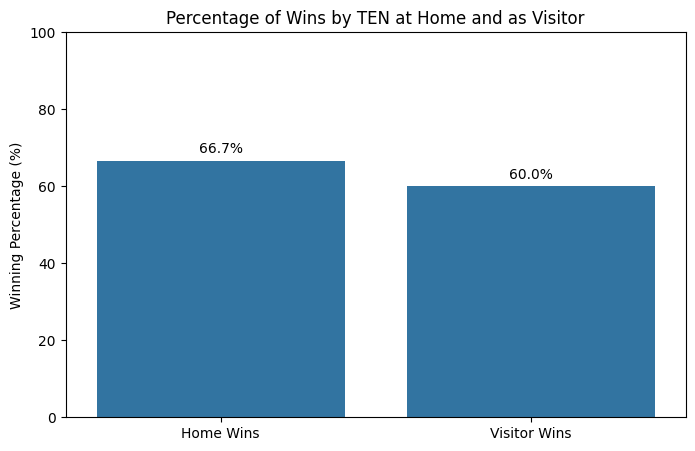

In [37]:
games = add_winning_columns(games, 'TEN')

calculate_team_wins(games, 'TEN')


Number of times DAL won at home: 4
Number of times DAL won as a visitor: 2
Total matches played by DAL: 8
Home matches played by DAL: 5
Visitor matches played by DAL: 3
Home win percentage for DAL: 80.0
Visitor win percentage for DAL: 66.66666666666666


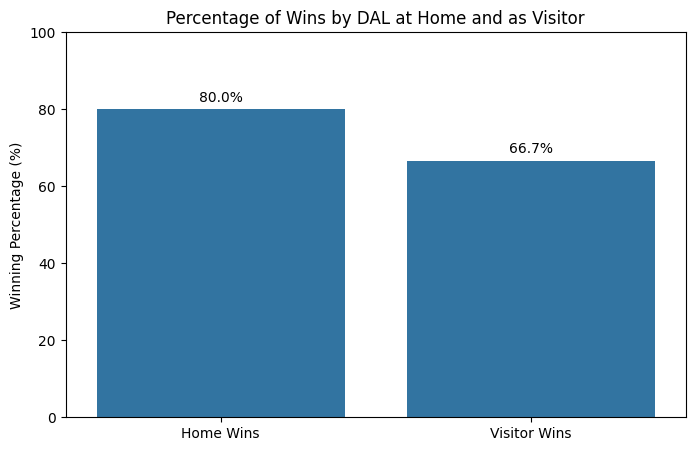

In [38]:
games = add_winning_columns(games, 'DAL')

calculate_team_wins(games, 'DAL')


Number of times SEA won at home: 3
Number of times SEA won as a visitor: 3
Total matches played by SEA: 9
Home matches played by SEA: 4
Visitor matches played by SEA: 5
Home win percentage for SEA: 75.0
Visitor win percentage for SEA: 60.0


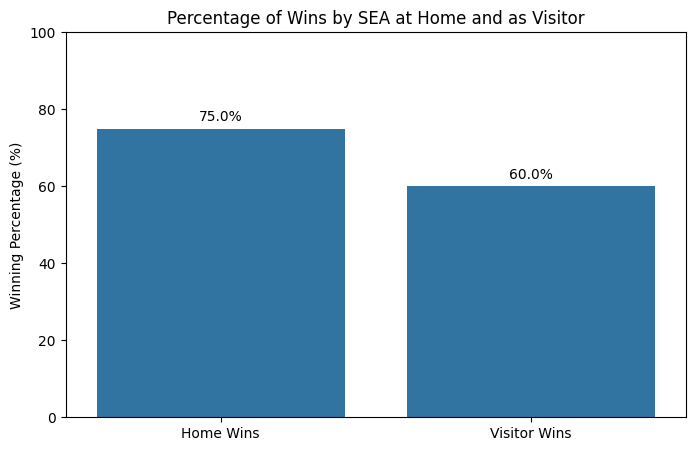

In [39]:
games = add_winning_columns(games, 'SEA')

calculate_team_wins(games, 'SEA')


Number of times KC won at home: 3
Number of times KC won as a visitor: 3
Total matches played by KC: 8
Home matches played by KC: 4
Visitor matches played by KC: 4
Home win percentage for KC: 75.0
Visitor win percentage for KC: 75.0


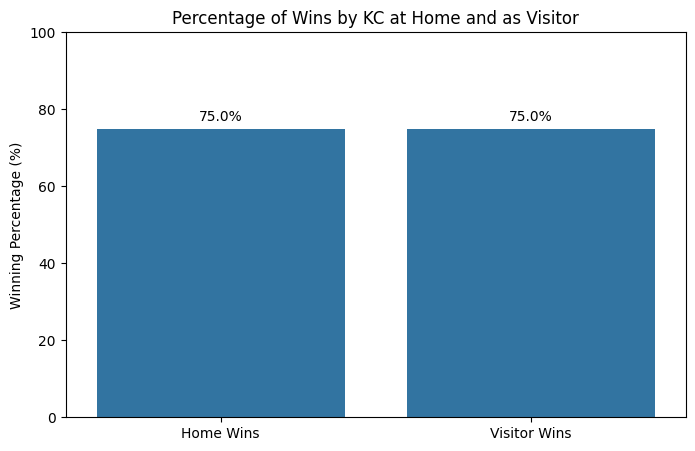

In [40]:
games = add_winning_columns(games, 'KC')

calculate_team_wins(games, 'KC')


Number of times BAL won at home: 2
Number of times BAL won as a visitor: 4
Total matches played by BAL: 9
Home matches played by BAL: 4
Visitor matches played by BAL: 5
Home win percentage for BAL: 50.0
Visitor win percentage for BAL: 80.0


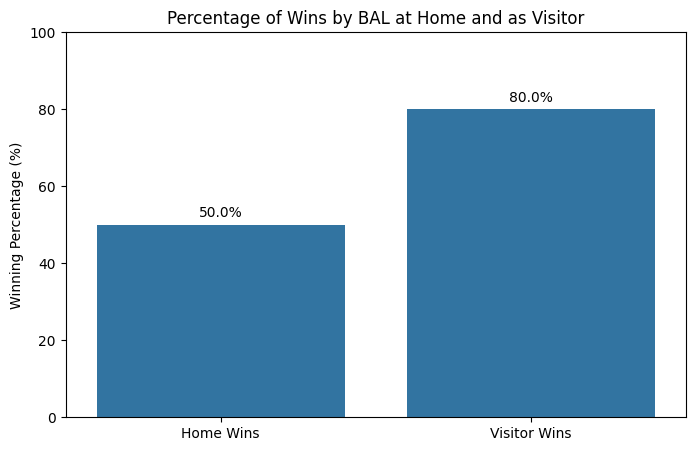

In [41]:
games = add_winning_columns(games, 'BAL')

calculate_team_wins(games, 'BAL')


Number of times CLE won at home: 2
Number of times CLE won as a visitor: 1
Total matches played by CLE: 8
Home matches played by CLE: 5
Visitor matches played by CLE: 3
Home win percentage for CLE: 40.0
Visitor win percentage for CLE: 33.33333333333333


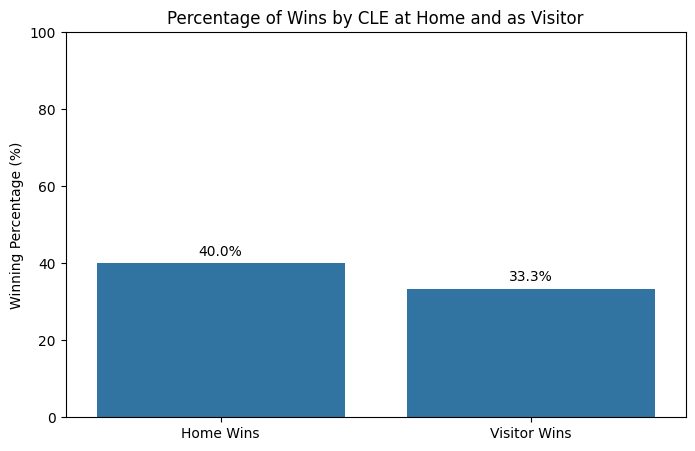

In [42]:
games = add_winning_columns(games, 'CLE')

calculate_team_wins(games, 'CLE')


Number of times JAX won at home: 2
Number of times JAX won as a visitor: 1
Total matches played by JAX: 9
Home matches played by JAX: 5
Visitor matches played by JAX: 4
Home win percentage for JAX: 40.0
Visitor win percentage for JAX: 25.0


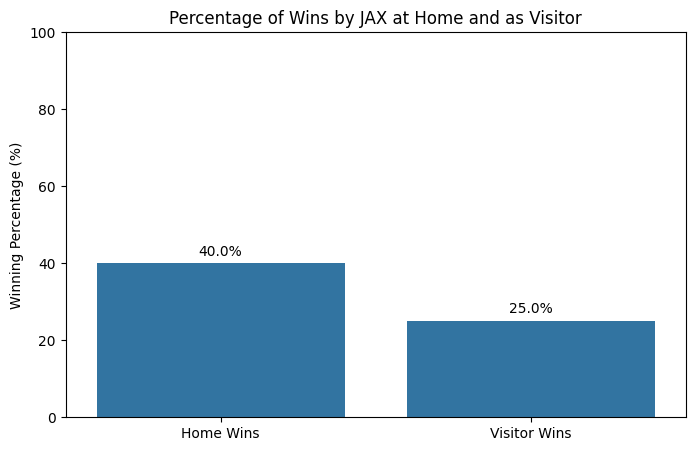

In [43]:
games = add_winning_columns(games, 'JAX')

calculate_team_wins(games, 'JAX')


Number of times NO won at home: 2
Number of times NO won as a visitor: 1
Total matches played by NO: 9
Home matches played by NO: 6
Visitor matches played by NO: 3
Home win percentage for NO: 33.33333333333333
Visitor win percentage for NO: 33.33333333333333


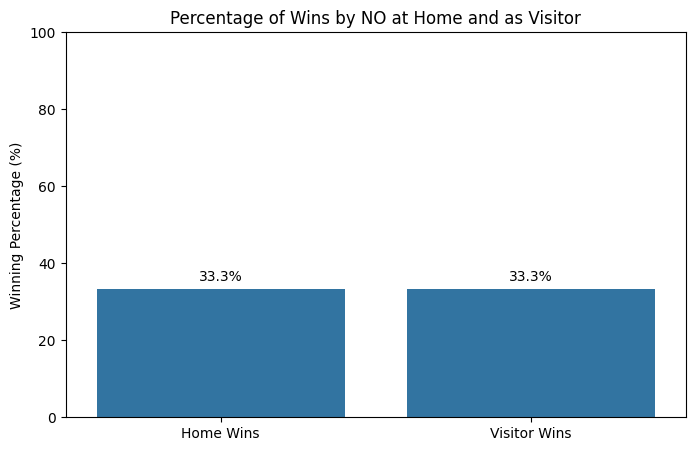

In [44]:
games = add_winning_columns(games, 'NO')

calculate_team_wins(games, 'NO')


Number of times NYG won at home: 3
Number of times NYG won as a visitor: 3
Total matches played by NYG: 8
Home matches played by NYG: 4
Visitor matches played by NYG: 4
Home win percentage for NYG: 75.0
Visitor win percentage for NYG: 75.0


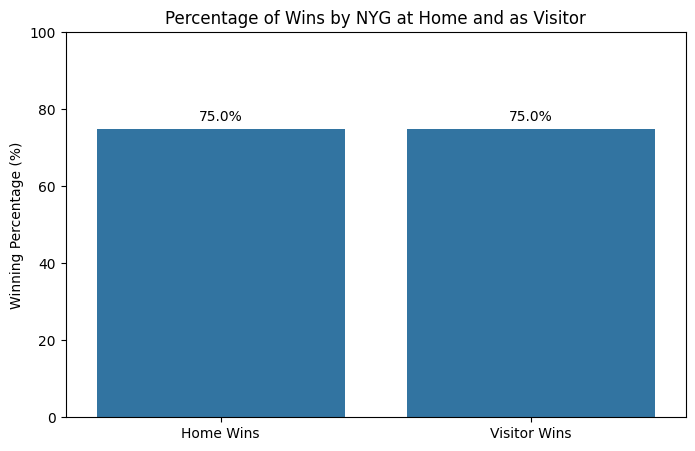

In [45]:
games = add_winning_columns(games, 'NYG')

calculate_team_wins(games, 'NYG')


Number of times PIT won at home: 1
Number of times PIT won as a visitor: 1
Total matches played by PIT: 8
Home matches played by PIT: 3
Visitor matches played by PIT: 5
Home win percentage for PIT: 33.33333333333333
Visitor win percentage for PIT: 20.0


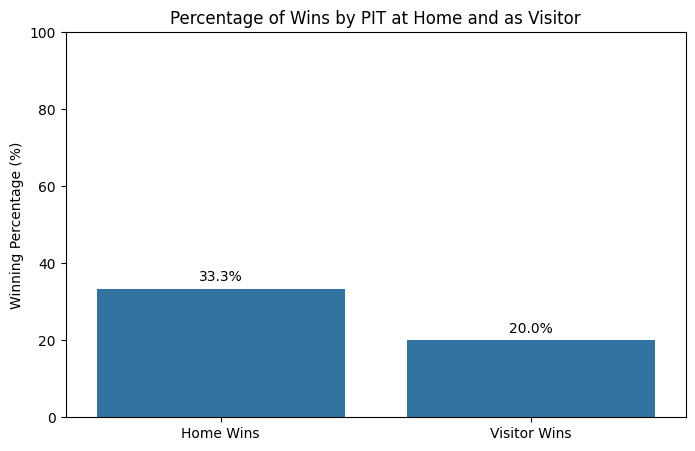

In [46]:
games = add_winning_columns(games, 'PIT')

calculate_team_wins(games, 'PIT')


Number of times SF won at home: 2
Number of times SF won as a visitor: 2
Total matches played by SF: 8
Home matches played by SF: 3
Visitor matches played by SF: 5
Home win percentage for SF: 66.66666666666666
Visitor win percentage for SF: 40.0


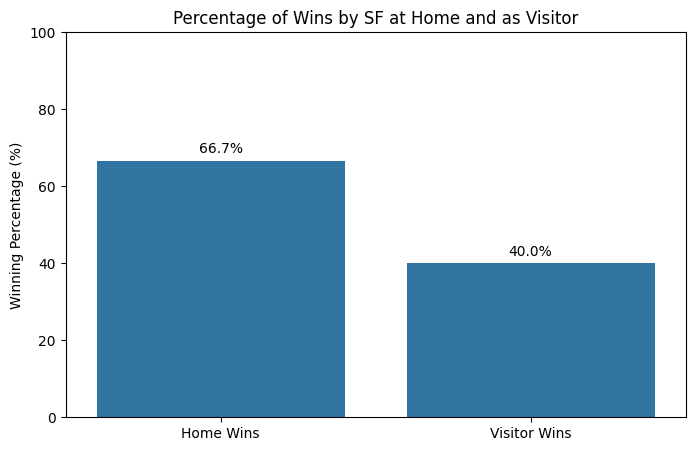

In [47]:
games = add_winning_columns(games, 'SF')

calculate_team_wins(games, 'SF')


Number of times DEN won at home: 2
Number of times DEN won as a visitor: 1
Total matches played by DEN: 8
Home matches played by DEN: 4
Visitor matches played by DEN: 4
Home win percentage for DEN: 50.0
Visitor win percentage for DEN: 25.0


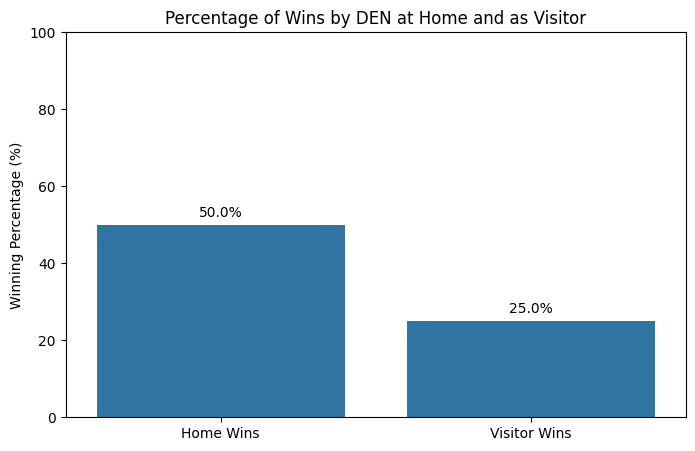

In [48]:
games = add_winning_columns(games, 'DEN')

calculate_team_wins(games, 'DEN')


Number of times LV won at home: 2
Number of times LV won as a visitor: 0
Total matches played by LV: 8
Home matches played by LV: 3
Visitor matches played by LV: 5
Home win percentage for LV: 66.66666666666666
Visitor win percentage for LV: 0.0


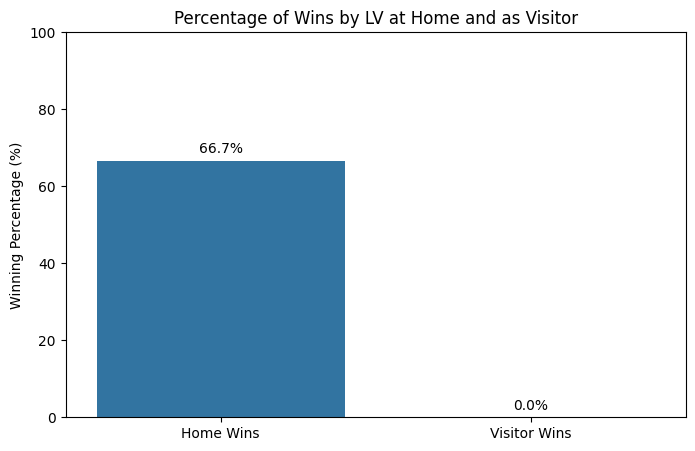

In [49]:
games = add_winning_columns(games, 'LV')

calculate_team_wins(games, 'LV')


Number of times GB won at home: 2
Number of times GB won as a visitor: 1
Total matches played by GB: 9
Home matches played by GB: 4
Visitor matches played by GB: 5
Home win percentage for GB: 50.0
Visitor win percentage for GB: 20.0


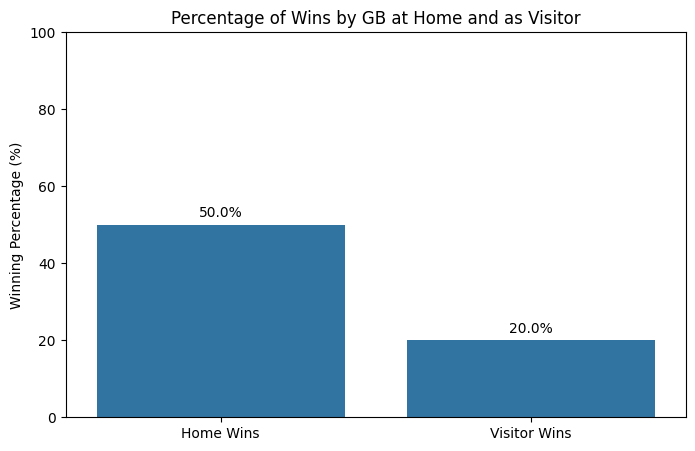

In [50]:
games = add_winning_columns(games, 'GB')

calculate_team_wins(games, 'GB')


Number of times BUF won at home: 3
Number of times BUF won as a visitor: 3
Total matches played by BUF: 8
Home matches played by BUF: 3
Visitor matches played by BUF: 5
Home win percentage for BUF: 100.0
Visitor win percentage for BUF: 60.0


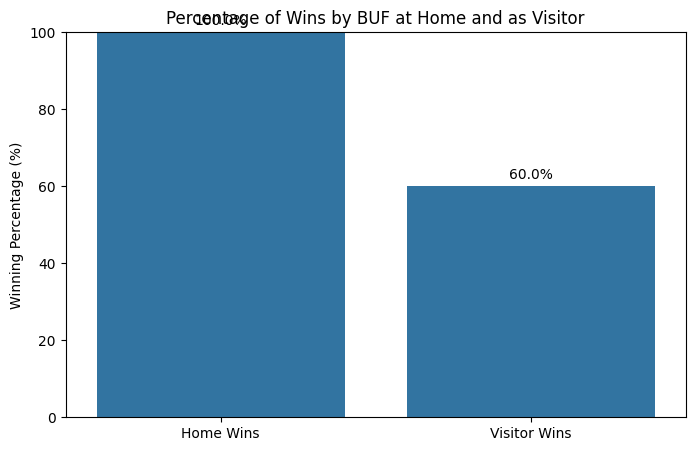

In [51]:
games = add_winning_columns(games, 'BUF')

calculate_team_wins(games, 'BUF')


Number of times PHI won at home: 4
Number of times PHI won as a visitor: 4
Total matches played by PHI: 8
Home matches played by PHI: 4
Visitor matches played by PHI: 4
Home win percentage for PHI: 100.0
Visitor win percentage for PHI: 100.0


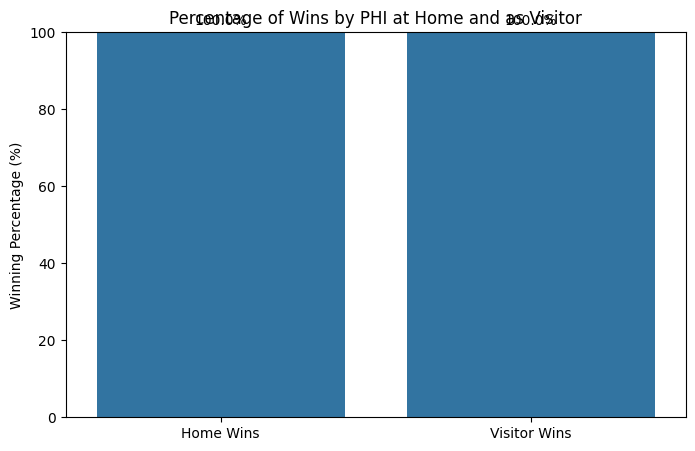

In [52]:
games = add_winning_columns(games, 'PHI')

calculate_team_wins(games, 'PHI')


Number of times IND won at home: 2
Number of times IND won as a visitor: 2
Total matches played by IND: 9
Home matches played by IND: 4
Visitor matches played by IND: 5
Home win percentage for IND: 50.0
Visitor win percentage for IND: 40.0


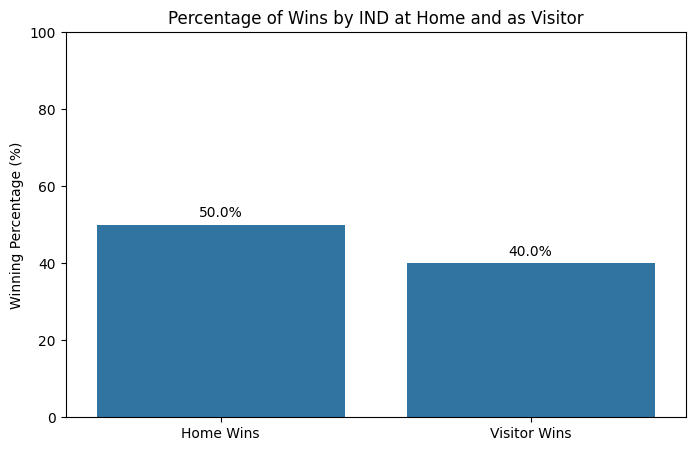

In [53]:
games = add_winning_columns(games, 'IND')

calculate_team_wins(games, 'IND')


Number of times NE won at home: 2
Number of times NE won as a visitor: 3
Total matches played by NE: 9
Home matches played by NE: 4
Visitor matches played by NE: 5
Home win percentage for NE: 50.0
Visitor win percentage for NE: 60.0


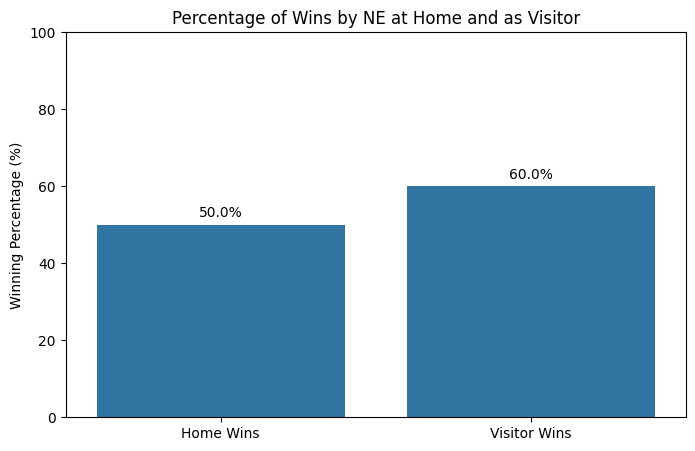

In [54]:
games = add_winning_columns(games, 'NE')

calculate_team_wins(games, 'NE')


Number of times TB won at home: 2
Number of times TB won as a visitor: 2
Total matches played by TB: 9
Home matches played by TB: 5
Visitor matches played by TB: 4
Home win percentage for TB: 40.0
Visitor win percentage for TB: 50.0


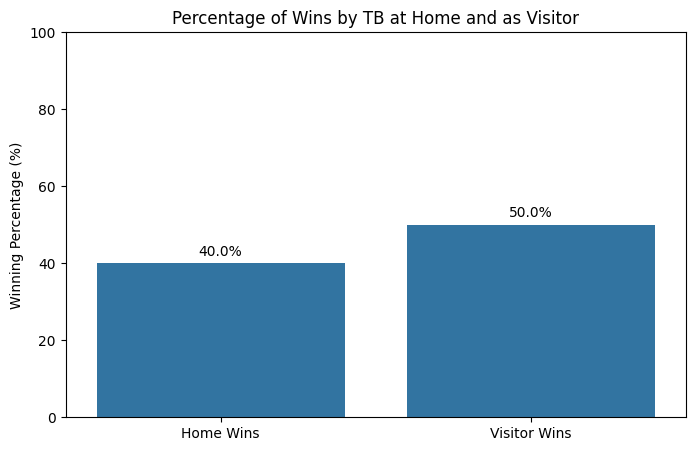

In [55]:
games = add_winning_columns(games, 'TB')

calculate_team_wins(games, 'TB')


# **Top 5 teams won in home and visitor ground.**

In [56]:

def get_top_teams(games, top_n=5):

    # Create empty dictionaries to store wins
    home_wins = {}
    visitor_wins = {}

    # Iterate through the games to calculate home and visitor wins for each team
    for team in games['homeTeamAbbr'].unique():
        home_wins[team] = len(games[(games['homeTeamAbbr'] == team) & (games['won'] == 'Home')])

    for team in games['visitorTeamAbbr'].unique():
        visitor_wins[team] = len(games[(games['visitorTeamAbbr'] == team) & (games['won'] == 'Visitor')])

    # Convert to DataFrames for easier manipulation
    home_wins_df = pd.DataFrame(list(home_wins.items()), columns=['Team', 'Home Wins'])
    visitor_wins_df = pd.DataFrame(list(visitor_wins.items()), columns=['Team', 'Visitor Wins'])

    # Merge the two DataFrames on 'Team'
    total_wins_df = pd.merge(home_wins_df, visitor_wins_df, on='Team', how='outer').fillna(0)

    # Sort teams by home and visitor wins
    top_home_teams = total_wins_df.sort_values(by='Home Wins', ascending=False).head(top_n)
    top_visitor_teams = total_wins_df.sort_values(by='Visitor Wins', ascending=False).head(top_n)

    return top_home_teams, top_visitor_teams



In [57]:
def plot_top_teams(top_home_teams, top_visitor_teams):
    # Create a figure with subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Plotting Home Wins
    sns.barplot(x='Home Wins', y='Team', data=top_home_teams, ax=axes[0], palette='Blues_d')
    axes[0].set_title('Top 5 Teams by Home Wins')
    axes[0].set_xlabel('Home Wins')
    axes[0].set_ylabel('Team')

    # Plotting Visitor Wins
    sns.barplot(x='Visitor Wins', y='Team', data=top_visitor_teams, ax=axes[1], palette='Oranges_d')
    axes[1].set_title('Top 5 Teams by Visitor Wins')
    axes[1].set_xlabel('Visitor Wins')
    axes[1].set_ylabel('Team')

    plt.tight_layout()
    plt.show()



<ipython-input-57-762632b02bbd>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-57-762632b02bbd>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




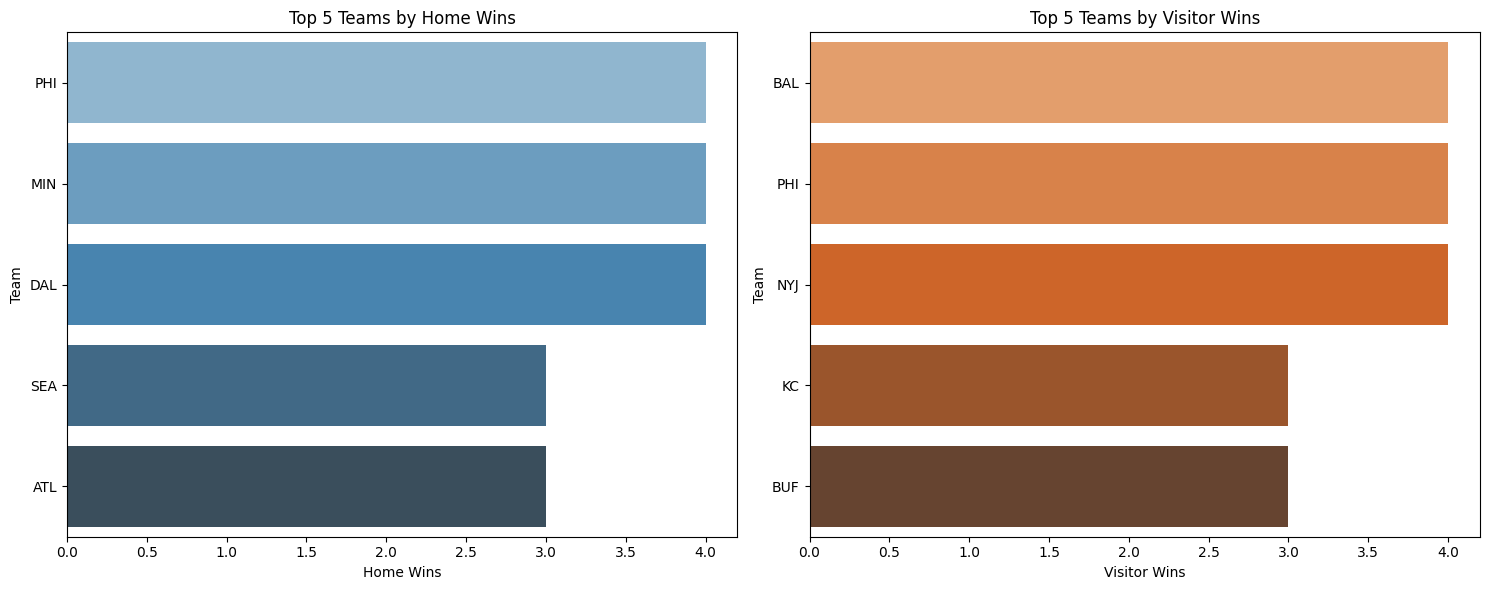

In [58]:

top_home_teams, top_visitor_teams = get_top_teams(games)
plot_top_teams(top_home_teams, top_visitor_teams)


# **Average goals scored by teams in home and visitor ground.**

In [59]:

def add_points_scored_columns(games, team_abbr):
    home_points_col = f'{team_abbr}_home_points'
    visitor_points_col = f'{team_abbr}_visitor_points'

    # Add columns for points scored by the team at home and as visitor
    games[home_points_col] = games.apply(lambda row: row['homeFinalScore'] if row['homeTeamAbbr'] == team_abbr else 0, axis=1)
    games[visitor_points_col] = games.apply(lambda row: row['visitorFinalScore'] if row['visitorTeamAbbr'] == team_abbr else 0, axis=1)

    return games



In [60]:
def calculate_average_points(games, team_abbr):
    home_points_col = f'{team_abbr}_home_points'
    visitor_points_col = f'{team_abbr}_visitor_points'

    # Calculate average points scored at home and as visitor
    total_home_points = games[home_points_col].sum()
    total_visitor_points = games[visitor_points_col].sum()

    home_games = games[games['homeTeamAbbr'] == team_abbr]
    visitor_games = games[games['visitorTeamAbbr'] == team_abbr]

    average_home_points = total_home_points / len(home_games) if len(home_games) > 0 else 0
    average_visitor_points = total_visitor_points / len(visitor_games) if len(visitor_games) > 0 else 0

    print(f"Average points scored by {team_abbr} at home:", average_home_points)
    print(f"Average points scored by {team_abbr} as a visitor:", average_visitor_points)

    # Plot the average points
    categories = ['Average Home Points', 'Average Visitor Points']
    averages = [average_home_points, average_visitor_points]

    plt.figure(figsize=(8, 5))
    sns.barplot(x=categories, y=averages)

    # Add titles and labels
    plt.title(f'Average Points Scored by {team_abbr} at Home and as Visitor')
    plt.ylabel('Average Points Scored')

    # Display averages on top of bars
    for i, avg in enumerate(averages):
        plt.text(i, avg + 0.1, f'{avg:.1f}', ha='center')

    # Show the plot
    plt.show()




Average points scored by NYJ at home: 19.6
Average points scored by NYJ as a visitor: 24.5


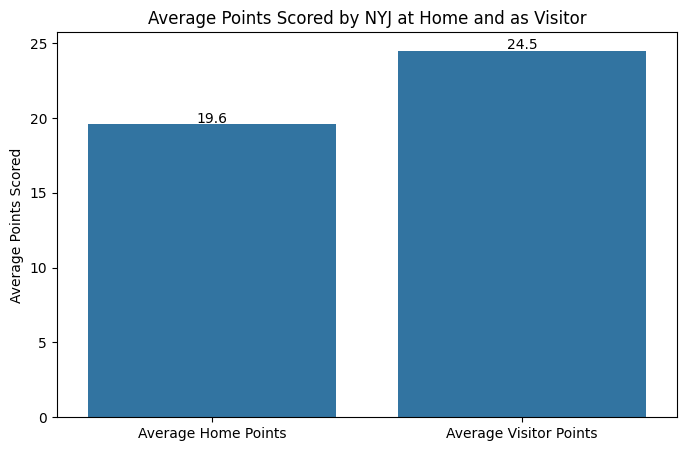

In [61]:
team_abbr = "NYJ"  # Replace with the team abbreviation you want to analyze
games = add_winning_columns(games, team_abbr)  # Ensure to add winning columns first
games = add_points_scored_columns(games, team_abbr)
calculate_average_points(games, team_abbr)

# Score margin **bold text**

In [62]:


def calculate_score_margin(games):
    games['score_margin'] = games['homeFinalScore'] - games['visitorFinalScore']
    games['winner'] = games.apply(lambda row: 'Home' if row['score_margin'] > 0 else ('Visitor' if row['score_margin'] < 0 else 'Draw'), axis=1)
    return games



# Trends over score margin of **weeks**

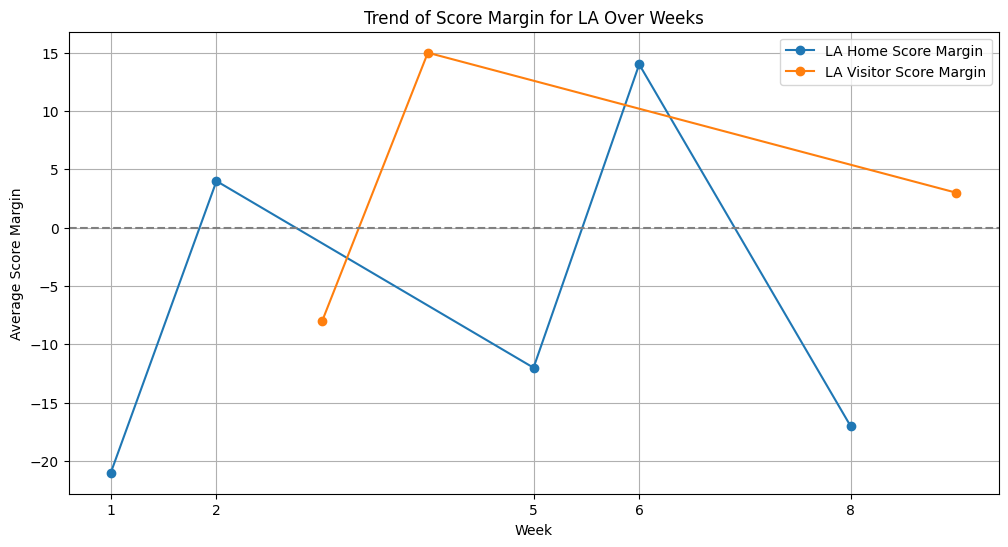

In [63]:
def analyze_trends(games, team_abbr):
    home_games = games[games['homeTeamAbbr'] == team_abbr]
    visitor_games = games[games['visitorTeamAbbr'] == team_abbr]

    # Calculate average score margin over weeks
    home_score_margin = home_games.groupby('week')['score_margin'].mean()
    visitor_score_margin = visitor_games.groupby('week')['score_margin'].mean()

    # Plot trends over time
    plt.figure(figsize=(12, 6))
    plt.plot(home_score_margin.index, home_score_margin.values, marker='o', label=f'{team_abbr} Home Score Margin')
    plt.plot(visitor_score_margin.index, visitor_score_margin.values, marker='o', label=f'{team_abbr} Visitor Score Margin')

    plt.title(f'Trend of Score Margin for {team_abbr} Over Weeks')
    plt.xlabel('Week')
    plt.ylabel('Average Score Margin')
    plt.xticks(home_score_margin.index)
    plt.axhline(0, color='grey', linestyle='--')  # Line for draw
    plt.legend()
    plt.grid()
    plt.show()

games = calculate_score_margin(games)  # Calculate score margins
team_abbr = "LA"  # Replace with the team abbreviation you want to analyze
analyze_trends(games, team_abbr)

# **Face to Face matches**

LA Wins against BUF: 0
BUF Wins against LA: 1


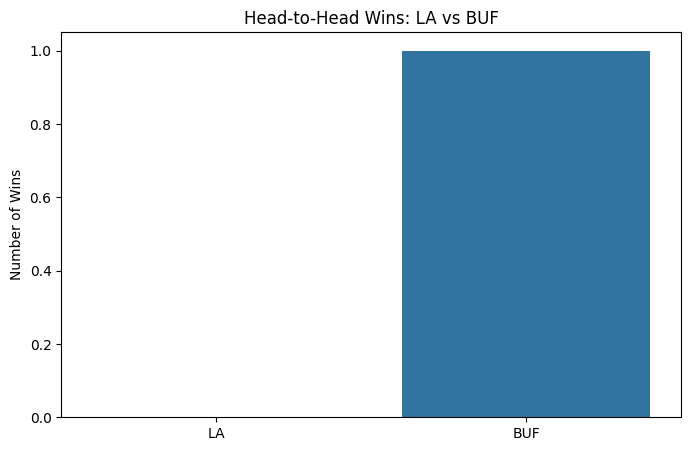

In [64]:
def head_to_head_analysis(games, team1_abbr, team2_abbr):
    # Filter games between the two teams
    head_to_head_games = games[((games['homeTeamAbbr'] == team1_abbr) & (games['visitorTeamAbbr'] == team2_abbr)) |
                                ((games['homeTeamAbbr'] == team2_abbr) & (games['visitorTeamAbbr'] == team1_abbr))]

    # Calculate wins for each team in head-to-head matchups
    team1_wins = head_to_head_games[head_to_head_games['winner'] == 'Home'].shape[0] if team1_abbr in head_to_head_games['homeTeamAbbr'].values else 0
    team2_wins = head_to_head_games[head_to_head_games['winner'] == 'Visitor'].shape[0] if team2_abbr in head_to_head_games['visitorTeamAbbr'].values else 0

    print(f"{team1_abbr} Wins against {team2_abbr}:", team1_wins)
    print(f"{team2_abbr} Wins against {team1_abbr}:", team2_wins)

    # Plot head-to-head results
    results = [team1_wins, team2_wins]
    categories = [team1_abbr, team2_abbr]

    plt.figure(figsize=(8, 5))
    sns.barplot(x=categories, y=results)

    plt.title(f'Head-to-Head Wins: {team1_abbr} vs {team2_abbr}')
    plt.ylabel('Number of Wins')
    plt.show()

# Example usage
# Analyze trends over time
head_to_head_analysis(games, "LA", "BUF")  # Replace with team abbreviations for head-to-head analysis
